# Implementation of Reinforcement Learning algorithms for cliffwalking environment

In [1]:
import gym
import gym.spaces
import numpy as np
import random
import scipy
import matplotlib.pyplot as plot

env = gym.make('CliffWalking-v0')

In [2]:
def execute():
    print ("Ausführungsphase")
    # Umgebung zurücksetzen
    env.reset()
    # Variablen initialisieren
    done = False
    steps = 0
    score = 0
    
    while(done == False):
        # Bewertung der Aktionen:
        # -100 für Fallen (Cliff)
        # -1 für alle anderen Aktionen
        # next_state, reward, done, _ = env.step(action)
        # 0 = Up, 1 = Right, 2 = Down, 3 = Left
        
        # Zählt die Schritte bis zum Spielende
        steps += 1
        # Wählt eine zufällige Aktion aus allen verfügbaren (dem action_space)
        action = env.action_space.sample() 
              
        # Führe die ausgewählte Aktion aus
        _, reward, done,_ = env.step(action)
        
        score += reward
        
    print (f"Schritte: {steps}, Ergebnis: {score}")

In [3]:
execute()
env.render()

Ausführungsphase
Schritte: 233, Ergebnis: -1421
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x



## Q-Learning

In [4]:
def learn(episodes):
    print ("Lernphase")
   
    # Epsilon für Exploration
    epsilon = 1
    
    # Lernparameter
    alpha = 0.6
    gamma = 1
    scores = []
    
    # Lernen
    for episode in range(episodes):
        # Zurücksetzen der Umgebung vor jeder neuen Episode, Merken des Startzustandes
        state = env.reset()
        # Variablen initialisieren
        score = 0
        done = False
        
        # Gehe bis zum Spielende für jede Episode durch
        while(done == False):
            
            # Wähle die am besten bewertete Aktion mit Wahrscheinlichkeit 1-epsilon
            if random.uniform(0, 1) > epsilon:
                action = np.argmax(Q1[state, :])
            else:
                # Sonst führe eine zufällige Aktion aus
                action = env.action_space.sample()
            
            
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            
            # Aktualisierung der Q Werte, Index ist aktueller Status und die ausgeführte Aktion
            # Q-Learning Formel
            Q1[state, action] = (1 - alpha) * Q1[state, action] + alpha * (reward + gamma * np.max(Q1[next_state, :]))
            
            # Neuen Zustand setzen
            state = next_state
            
            
        scores.append(score)
        # Zeige die Bewertungen einer Episode graphisch über der Anzahl Episoden an
        plot.plot(scores, ".")
        
        # Ausgabe alle 1000 Episoden
        if(episode % 10 == 0):
            print (f"Iteration: {episode}, Ergebnis: {score}")
                    
        # Epsilon für jede Episode reduzieren falls es noch über einem Minimalwert liegt
        if (epsilon > 0.01):
            epsilon *= 0.98
            
plot.show()

In [5]:
def execute(cycles):
    print ("Ausführungsphase")    
    
    all_steps = 0
    scores = 0
    
    for cycle in range(cycles):
        
        # Zurücksetzen der Umgebung und Variablen initialisieren
        done = False
        state = env.reset()
        score = 0
        steps = 0
        
        if (cycle == 99):
            # Startzustand anzeigen (letzter Lauf)
            env.render()
    
        while(done == False):
            # Zähle Schritte bis zum Ziel hoch
            steps += 1
            # Wähle die am Besten bewertete Aktion aus
            action = np.argmax(Q1[state, :])
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            # Weitergehen
            state = next_state
        
            if (cycle == 99):
                # Zeige den aktuellen Zustand für den letzten Lauf
                env.render()
                
        all_steps += steps
        scores += score
                
        if (cycle == 99):
            print (f"Schritte: {steps}, Ergebnis: {score}")
        
    print ((f"Für {cycles} Zyklen: durchschnittliche Schritte zum Ziel {all_steps/cycles}, durchschnittliches Ergebnis: {scores/cycles}"))

Lernphase
Iteration: 0, Ergebnis: -130835
Iteration: 10, Ergebnis: -832
Iteration: 20, Ergebnis: -1027
Iteration: 30, Ergebnis: -136
Iteration: 40, Ergebnis: -131
Iteration: 50, Ergebnis: -14
Iteration: 60, Ergebnis: -232
Iteration: 70, Ergebnis: -20
Iteration: 80, Ergebnis: -13
Iteration: 90, Ergebnis: -224
Ausführungsphase
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C

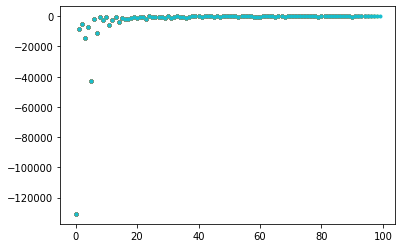

In [6]:
# Matrix für Q-Werte, initial auf 0
Q1 = np.zeros((env.observation_space.n, env.action_space.n))

learn(100)
execute(100)

In [7]:
# print the estimated optimal policy
policy_q = np.array([np.argmax(Q1[key])for key in np.arange(48)]).reshape((4,12))

print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_q)



Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[2 2 1 1 1 1 1 2 2 2 2 2]
 [2 1 2 1 1 2 1 2 1 1 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


# SARSA

In [8]:
def get_action(state, epsilon):
    # Wähle die am besten bewertete Aktion mit Wahrscheinlichkeit 1-epsilon
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Q2[state, :])
    else:
        # Sonst führe eine zufällige Aktion aus
        action = env.action_space.sample()
    return action        
            
    
def learn(episodes):
    print ("Lernphase")
    
    # Epsilon für Exploration
    epsilon = 1
    
    # Lernparameter
    alpha = 0.2
    gamma = 1
    scores = [];
    
    
    # Lernen
    for episode in range(episodes):
        # Zurücksetzen der Umgebung vor jeder neuen Episode, Merken des Startzustandes
        state = env.reset()
        # Variablen initialisieren
        score = 0
        done = False
        action = get_action(state, epsilon)
        
        while(done == False):
                        
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            
            # Nächste Aktion aus dem nächsten Zustand errechnen, diese kann auch zufällig sein
            next_action = get_action(next_state, epsilon)
            
            # Aktualisierung der Q Werte, Index ist aktueller Status und die ausgeführte Aktion
            # SARSA Formel
            Q2[state, action] = (1 - alpha) * Q2[state, action] + alpha * (reward + gamma * Q2[next_state, next_action])
            
            # Neuen Zustand und nächste Aktion setzen
            state = next_state
            action = next_action
            
        scores.append(score)
        # Zeige die Bewertungen einer Episode graphisch über der Anzahl Episoden an
        plot.plot(scores, ".")
            
        # Ausgabe alle 1000 Episoden
        if(episode % 10 == 0):
            print (f"Iteration: {episode}, Ergebnis: {score}")
            
        # Epsilon reduzieren falls es noch über einem Minimalwert liegt
        if (epsilon > 0.01):
            epsilon *= 0.98
            
plot.show()

In [9]:
def execute(cycles):
    print ("Ausführungsphase")    
    
    all_steps = 0
    scores = 0
    
    for cycle in range(cycles):
        
        # Zurücksetzen der Umgebung und Variablen initialisieren
        done = False
        state = env.reset()
        score = 0
        steps = 0
        
        if (cycle == 99):
            # Startzustand anzeigen (letzter Lauf)
            env.render()
    
        while(done == False):
            # Zähle Schritte bis zum Ziel hoch
            steps += 1
            # Wähle die am Besten bewertete Aktion aus
            action = np.argmax(Q2[state, :])
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            # Weitergehen
            state = next_state
        
            if (cycle == 99):
                # Zeige den aktuellen Zustand für den letzten Lauf
                env.render()
                
        all_steps += steps
        scores += score
                
        if (cycle == 99):
            print (f"Schritte: {steps}, Ergebnis: {score}")
        
    print ((f"Für {cycles} Zyklen: durchschnittliche Schritte zum Ziel {all_steps/cycles}, durchschnittliches Ergebnis: {scores/cycles}"))

Lernphase
Iteration: 0, Ergebnis: -87250
Iteration: 10, Ergebnis: -2589
Iteration: 20, Ergebnis: -43
Iteration: 30, Ergebnis: -43
Iteration: 40, Ergebnis: -39
Iteration: 50, Ergebnis: -22
Iteration: 60, Ergebnis: -119
Iteration: 70, Ergebnis: -25
Iteration: 80, Ergebnis: -26
Iteration: 90, Ergebnis: -18
Ausführungsphase
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  x  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  

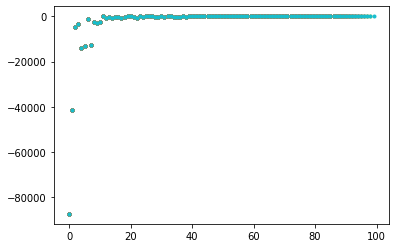

In [10]:
# Matrix für Q-Werte, initial auf 0
Q2 = np.zeros((env.observation_space.n, env.action_space.n))

learn(100)
execute(100)

In [11]:
# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q2[key])for key in np.arange(48)]).reshape((4,12))

print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)



Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 1 1 0 0 0 0 0 1 2]
 [0 0 0 0 0 1 1 0 0 0 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


## Sarsa $\lambda$

In [12]:
def get_action(state, epsilon):
    # Wähle die am besten bewertete Aktion mit Wahrscheinlichkeit 1-epsilon
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Q3[state, :])
    else:
        # Sonst führe eine zufällige Aktion aus
        action = env.action_space.sample()
    return action        
            
    
def learn(episodes):
    print ("Lernphase")
    
    # Epsilon für Exploration
    epsilon = 1
    
    # Lernparameter
    alpha = 0.2
    gamma = 1
    scores = [];
    
    
    # Lernen
    for episode in range(episodes):
        # Zurücksetzen der Umgebung vor jeder neuen Episode, Merken des Startzustandes
        state = env.reset()
        # Variablen initialisieren
        score = 0
        done = False
        action = get_action(state, epsilon)
        
        while(done == False):
                        
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            
            # Nächste Aktion aus dem nächsten Zustand errechnen, diese kann auch zufällig sein
            next_action = get_action(next_state, epsilon)
            
            # Aktualisierung der Q Werte, Index ist aktueller Status und die ausgeführte Aktion
            # Sarsamax Formel
            Qsa_next = np.max(Q3[next_state]) if next_state is not None else 0  # value of next state 
            Q3[state, action] = (1 - alpha) * Q3[state, action] + alpha * (reward + gamma * Qsa_next)
            
            # Neuen Zustand und nächste Aktion setzen
            state = next_state
            action = next_action
            
        scores.append(score)
        # Zeige die Bewertungen einer Episode graphisch über der Anzahl Episoden an
        plot.plot(scores, ".")
            
        # Ausgabe alle 1000 Episoden
        if(episode % 10 == 0):
            print (f"Iteration: {episode}, Ergebnis: {score}")
            
        # Epsilon reduzieren falls es noch über einem Minimalwert liegt
        if (epsilon > 0.01):
            epsilon *= 0.98
            
plot.show()

In [13]:
def execute(cycles):
    print ("Ausführungsphase")    
    
    all_steps = 0
    scores = 0
    
    for cycle in range(cycles):
        
        # Zurücksetzen der Umgebung und Variablen initialisieren
        done = False
        state = env.reset()
        score = 0
        steps = 0
        
        
        if (cycle == 99):
            # Startzustand anzeigen (letzter Lauf)
            env.render()
    
        while(done == False):
            # Zähle Schritte bis zum Ziel hoch
            steps += 1
            # Wähle die am Besten bewertete Aktion aus
            action = np.argmax(Q3[state, :])
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            # Weitergehen
            state = next_state
        
            if (cycle == 99):
                # Zeige den aktuellen Zustand für den letzten Lauf
                env.render()
                
        all_steps += steps
        scores += score
                
        if (cycle == 99):
            print (f"Schritte: {steps}, Ergebnis: {score}")
        
    print ((f"Für {cycles} Zyklen: durchschnittliche Schritte zum Ziel {all_steps/cycles}, durchschnittliches Ergebnis: {scores/cycles}"))

Lernphase
Iteration: 0, Ergebnis: -89222
Iteration: 10, Ergebnis: -2476
Iteration: 20, Ergebnis: -4005
Iteration: 30, Ergebnis: -366
Iteration: 40, Ergebnis: -28
Iteration: 50, Ergebnis: -136
Iteration: 60, Ergebnis: -26
Iteration: 70, Ergebnis: -15
Iteration: 80, Ergebnis: -21
Iteration: 90, Ergebnis: -15
Ausführungsphase
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  

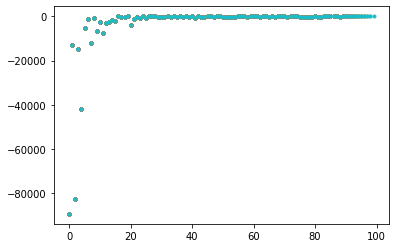

In [14]:
# Matrix für Q-Werte, initial auf 0
Q3 = np.zeros((env.observation_space.n, env.action_space.n))

learn(100)
execute(100)

In [16]:
# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q3[key]) for key in np.arange(48)]).reshape((4,12))

print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[1 2 2 1 1 2 1 2 1 2 2 2]
 [1 1 1 1 2 1 2 2 1 1 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
